In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math as ma
from scipy.interpolate import interp1d
from scipy.stats.stats import pearsonr
from scipy.optimize import leastsq
from matplotlib.ticker import ScalarFormatter
import statsmodels.api as sm

C:\Users\damps\Anaconda3\Anaconda3a\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
df1 = pd.read_csv(r"C:\Users\damps\Documents\pet_supplies_2212(2).csv")

In [4]:
df1.head()

,product_id,category,animal,size,price,sales,rating,repeat_purchase
0,1,Food,Bird,large,51.1,1860.62,7.0,1
1,2,Housing,Bird,MEDIUM,35.98,963.60,6.0,0
2,3,Food,Dog,medium,31.23,898.30,5.0,1
3,4,Medicine,Cat,small,24.95,982.15,6.0,1
4,5,Housing,Cat,Small,26.18,832.63,7.0,1


In [5]:
df1.isna().sum()

product_id           0
category             0
animal               0
size                 0
price                0
sales                0
rating             150
repeat_purchase      0
dtype: int64

In [6]:
df1['category'].unique()

array(['Food', 'Housing', 'Medicine', 'Toys', 'Equipment', 'Accessory',
       '-'], dtype=object)

In [7]:
df1['category'].value_counts()

Equipment    370
Food         260
Toys         255
Medicine     237
Housing      227
Accessory    126
-             25
Name: category, dtype: int64

In [8]:
df1.dtypes

product_id           int64
category            object
animal              object
size                object
price               object
sales              float64
rating             float64
repeat_purchase      int64
dtype: object

In [9]:
df1[['price', 'sales']] = df1[['price', 'sales']].astype(float, errors ='ignore')

In [10]:
df1[['category', 'animal']] = df1[['category', 'animal']].astype("category")

In [11]:
df1.head(30)

,product_id,category,animal,size,price,sales,rating,repeat_purchase
0,1,Food,Bird,large,51.1,1860.62,7.0,1
1,2,Housing,Bird,MEDIUM,35.98,963.60,6.0,0
2,3,Food,Dog,medium,31.23,898.30,5.0,1
3,4,Medicine,Cat,small,24.95,982.15,6.0,1
4,5,Housing,Cat,Small,26.18,832.63,7.0,1
5,6,Housing,Dog,Small,30.77,874.58,7.0,0
6,7,Housing,Dog,Small,31.04,875.07,5.0,0
7,8,Toys,Cat,medium,28.9,1074.31,4.0,0
8,9,Equipment,Fish,MEDIUM,17.82,503.67,5.0,0
9,10,Medicine,Dog,medium,24.93,838.88,8.0,0


In [12]:
df1['category'].value_counts()

Equipment    370
Food         260
Toys         255
Medicine     237
Housing      227
Accessory    126
-             25
Name: category, dtype: int64

In [13]:
df1['animal'].value_counts()

Cat     567
Fish    369
Dog     367
Bird    197
Name: animal, dtype: int64

In [14]:
df1['size'].value_counts()

small     372
medium    233
Small     225
SMALL     157
Medium    150
large     122
MEDIUM    109
Large      75
LARGE      57
Name: size, dtype: int64

In [15]:
df1['price'].value_counts()

unlisted    150
22.98        13
28           10
27.99         8
28.03         8
           ... 
42.88         1
39.96         1
25.94         1
41.08         1
38.98         1
Name: price, Length: 707, dtype: int64

In [16]:
df1['sales'].value_counts()

1034.36    3
998.18     2
790.28     2
1038.63    2
1085.60    2
          ..
465.62     1
709.87     1
816.48     1
1075.67    1
827.23     1
Name: sales, Length: 1476, dtype: int64

In [17]:
df1['size'] = df1['size'].str.lower().str.capitalize().astype("category")

In [18]:
df1['size'].unique()

['Large', 'Medium', 'Small']
Categories (3, object): ['Large', 'Medium', 'Small']

In [19]:
df1.dtypes

product_id            int64
category           category
animal             category
size               category
price                object
sales               float64
rating              float64
repeat_purchase       int64
dtype: object

In [20]:
df1['price'] = df1['price'].apply(pd.to_numeric, errors= 'coerce')

In [21]:
df1['price'].isna().sum()

150

In [22]:
df1['rating'].unique()

array([ 7.,  6.,  5.,  4.,  8.,  1.,  3., nan,  2.,  9.])

In [23]:
df1['rating'].value_counts()

5.0    304
6.0    299
4.0    283
3.0    190
7.0    143
8.0     61
2.0     43
9.0     15
1.0     12
Name: rating, dtype: int64

In [24]:
df1.dtypes

product_id            int64
category           category
animal             category
size               category
price               float64
sales               float64
rating              float64
repeat_purchase       int64
dtype: object

In [25]:
df1['rating'].unique()

array([ 7.,  6.,  5.,  4.,  8.,  1.,  3., nan,  2.,  9.])

In [26]:
df1['rating'] = df1['rating'].fillna(0)

In [27]:
df1['rating'] = df1['rating'].astype("int64")

In [28]:
df1.dtypes

product_id            int64
category           category
animal             category
size               category
price               float64
sales               float64
rating                int64
repeat_purchase       int64
dtype: object

In [29]:
df1['repeat_purchase'] = df1['repeat_purchase'].astype("category")

In [30]:
df1['sales'].median()

1000.8299999999999

In [31]:
df1['price'] = df1['price'].fillna(df1['price'].median())

In [32]:
df1['price'].isna().sum()

0

In [33]:
df1['category'] = df1['category'].replace(to_replace='-', value = 'Unknown')

In [34]:
df1['category'].unique()

['Food', 'Housing', 'Medicine', 'Toys', 'Equipment', 'Accessory', 'Unknown']
Categories (7, object): ['Food', 'Housing', 'Medicine', 'Toys', 'Equipment', 'Accessory', 'Unknown']

In [35]:
df1['animal'].unique()

['Bird', 'Dog', 'Cat', 'Fish']
Categories (4, object): ['Bird', 'Dog', 'Cat', 'Fish']

In [36]:
df1['size'].unique()

['Large', 'Medium', 'Small']
Categories (3, object): ['Large', 'Medium', 'Small']

In [37]:
df1['rating'].unique()

array([7, 6, 5, 4, 8, 1, 3, 0, 2, 9], dtype=int64)

In [38]:
df1['repeat_purchase'].isna().sum()

0

In [39]:
df1.head()

,product_id,category,animal,size,price,sales,rating,repeat_purchase
0,1,Food,Bird,Large,51.10,1860.62,7,1
1,2,Housing,Bird,Medium,35.98,963.60,6,0
2,3,Food,Dog,Medium,31.23,898.30,5,1
3,4,Medicine,Cat,Small,24.95,982.15,6,1
4,5,Housing,Cat,Small,26.18,832.63,7,1


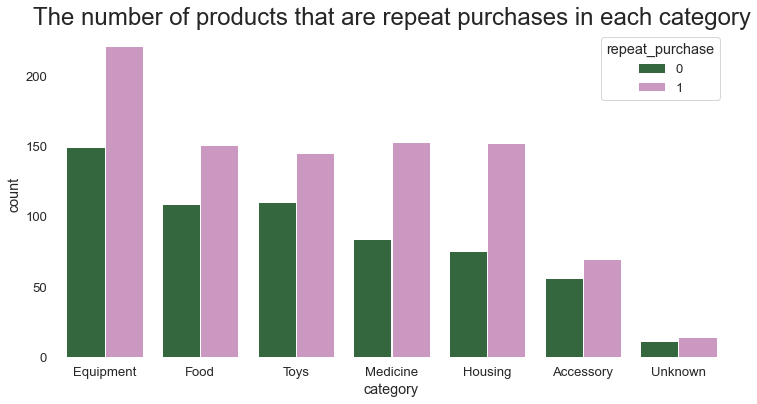

In [67]:
sns.set(rc={"figure.figsize":(12, 6)})
sns.set(font_scale=1.2)
sns.set_style("white")
sns.countplot(data=df1, x="category", hue="repeat_purchase", order=['Equipment', 'Food', 'Toys','Medicine','Housing',  'Accessory', 'Unknown'], palette="cubehelix").set_title('The number of products that are repeat purchases in each category', size =24)
sns.despine(bottom = True, left = True)
plt.savefig('Repeat_Purchases.png', dpi=300, bbox_inches='tight');

In [41]:
df2= df1[df1['repeat_purchase'] ==1]

In [42]:
df2.head()

,product_id,category,animal,size,price,sales,rating,repeat_purchase
0,1,Food,Bird,Large,51.10,1860.62,7,1
2,3,Food,Dog,Medium,31.23,898.30,5,1
3,4,Medicine,Cat,Small,24.95,982.15,6,1
4,5,Housing,Cat,Small,26.18,832.63,7,1
10,11,Food,Dog,Large,40.87,1457.22,7,1


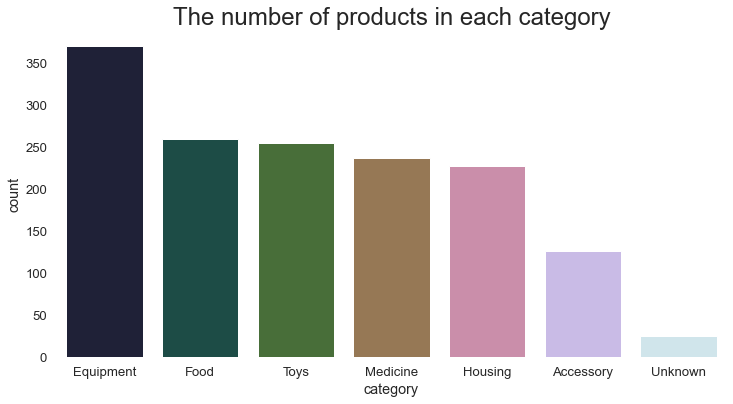

In [43]:
sns.set(rc={"figure.figsize":(12, 6)})
sns.set(font_scale=1.2)
sns.set_style("white")

sns.countplot(data=df1, x="category", order=['Equipment', 'Food', 'Toys','Medicine','Housing',  'Accessory', 'Unknown'], palette="cubehelix").set_title('The number of products in each category', size =24)
sns.despine(bottom = True, left = True)
plt.savefig('Repeat_Purchases1.png', dpi=300, bbox_inches='tight');

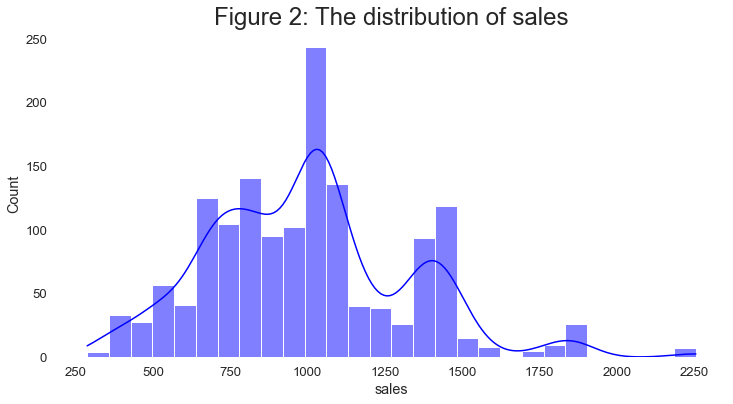

In [65]:
sns.set(rc={"figure.figsize":(12, 6)})
sns.set(font_scale=1.2)
sns.set_style("white")
sns.histplot(data=df1, x="sales", color="blue", kde=True).set_title('Figure 2: The distribution of sales', size =24)
sns.despine(bottom = True, left = True)
plt.savefig('sales.png', dpi=300, bbox_inches='tight');

In [45]:
from scipy.stats import shapiro
shapiro(df1['sales']);

In [46]:
from scipy.stats import kstest
kstest(df1['sales'], 'norm')

KstestResult(statistic=1.0, pvalue=0.0)

In [47]:
df1['log_sales'] = np.log(df1['sales'])

In [48]:
shapiro(df1['log_sales'])

ShapiroResult(statistic=0.9759871363639832, pvalue=3.958728334155009e-15)

In [49]:
kstest(df1['log_sales'], 'norm')

KstestResult(statistic=0.9999999923992273, pvalue=0.0)

In [50]:
df1['sqrt_sales'] = np.sqrt(df1['sales'])

In [51]:
shapiro(df1['sqrt_sales'])

ShapiroResult(statistic=0.988534152507782, pvalue=1.7243745320527637e-09)

In [52]:
df1.dtypes

product_id            int64
category           category
animal             category
size               category
price               float64
sales               float64
rating                int64
repeat_purchase    category
log_sales           float64
sqrt_sales          float64
dtype: object

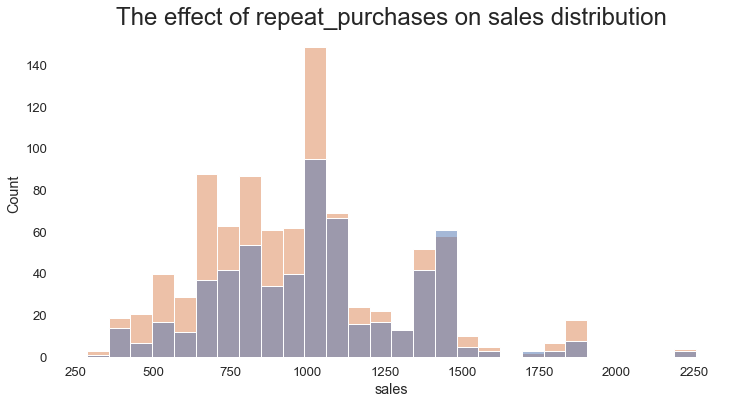

In [53]:
sns.set(rc={"figure.figsize":(12, 6)})
sns.set(font_scale=1.2)
sns.set_style("white")
sns.histplot(df1, x="sales", color="blue", hue="repeat_purchase", legend=False).set_title('The effect of repeat_purchases on sales distribution', size =24)
sns.despine(bottom = True, left = True)
plt.savefig('sales1.png', dpi=300, bbox_inches='tight');

In [54]:
yes = df1['sales'][df1['repeat_purchase']== 1]

In [55]:
yes.describe()

count     906.000000
mean      975.768400
std       326.985415
min       286.940000
25%       738.452500
50%       978.210000
75%      1112.007500
max      2255.960000
Name: sales, dtype: float64

In [56]:
no = df1['sales'][df1['repeat_purchase']== 0]

In [57]:
no.describe()

count     594.000000
mean     1028.368013
std       316.915770
min       288.010000
25%       795.745000
50%      1030.185000
75%      1208.892500
max      2254.990000
Name: sales, dtype: float64

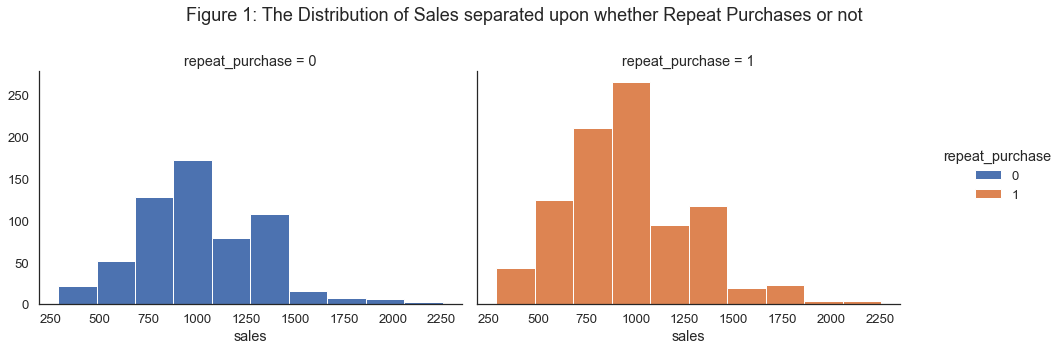

In [58]:
# Form a facetgrid using columns with a hue
graph = sns.FacetGrid(df1, col ="repeat_purchase", hue='repeat_purchase', margin_titles=True, height=5, aspect= 1.33)
# map the above form facetgrid with some attributes
graph.map(plt.hist, "sales", edgecolor ="w").add_legend()
graph.fig.subplots_adjust(top=0.8)
graph.fig.suptitle('Figure 1: The Distribution of Sales separated upon whether Repeat Purchases or not', size=18)
# show the object
sns.set(rc={"figure.figsize":(12, 6)})
sns.set(font_scale=1.2)
sns.set_style("white")
plt.savefig('sales2.png', dpi=300, bbox_inches='tight');

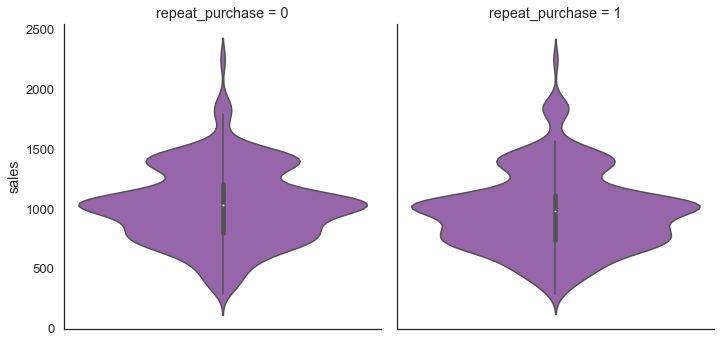

In [59]:
my_colors = ["#9b59b6", "#3498db"]
sns.set_palette(my_colors)
sns.catplot(
    data=df1, y='sales', 
    col='repeat_purchase', kind='violin', hue='repeat_purchase',col_wrap=2, 
);

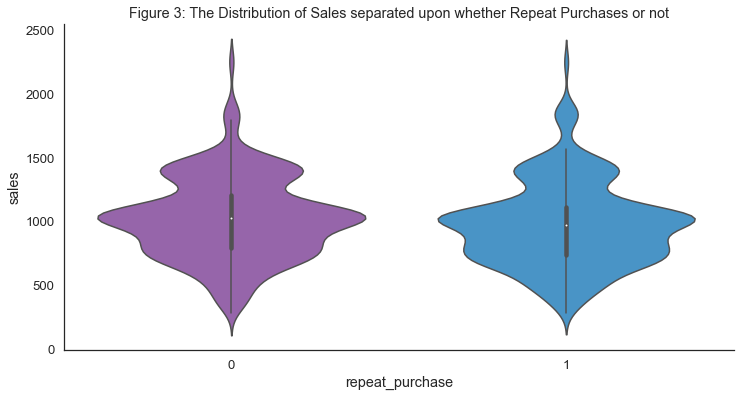

In [63]:
my_colors = ["#9b59b6", "#3498db"]
# add color array to set_palette
# function of seaborn
sns.set_palette(my_colors)
# make boxplot
sns.violinplot( y = "sales", x='repeat_purchase', data = df1).set(title='Figure 3: The Distribution of Sales separated upon whether Repeat Purchases or not')
sns.set(rc={"figure.figsize":(12, 6)})
sns.set(font_scale=1.2)
sns.set_style("white")
sns.despine(top= True, right = True)
plt.savefig('sales5.png', dpi=300, bbox_inches='tight');

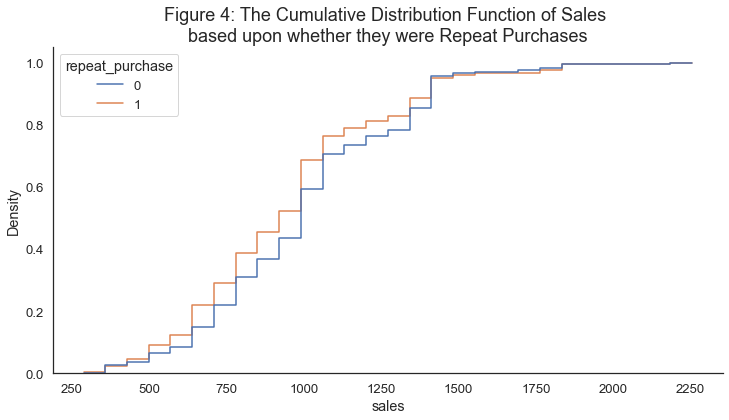

In [64]:
g=sns.histplot(
    data=df1, x="sales", hue="repeat_purchase",
    element="step", fill=False,
    cumulative=True, stat="density", common_norm=False).set_title('Figure 4: The Cumulative Distribution Function of Sales \nbased upon whether they were Repeat Purchases', size =18)
sns.set(rc={"figure.figsize":(12, 6)})
sns.set(font_scale=1.2)
sns.set_style("white")
sns.despine(top= True, right = True)

plt.savefig('sales4.png', dpi=300, bbox_inches='tight');